<a href="https://colab.research.google.com/github/AycaCicek/MedicalCostAnalyze-ML-Regression/blob/main/KE%C5%9E%C4%B0FSELVER%C4%B0ANAL%C4%B0Z%C4%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KEŞİFSEL VERİ ANALİZİ**

DEĞİŞKENLER

* YAŞ :birincil yararlanıcının yaşı
* CİNSİYET : kadın, erkek
* BMI:bedenin anlaşılmasını sağlayan beden kitle indeksi,ideal olarak 18,5 ila 24,9
* ÇOCUKLAR:Sağlık sigortası kapsamındaki çocuk sayısı / bakmakla yükümlü olunan kişi sayısı
* SİGARA:Sigara içmek
* BÖLGE:yararlanıcının ABD'deki yerleşim bölgesi--> *kuzeydoğu, güneydoğu, güneybatı, kuzeybatı.*
* ÜCRETLER:Sağlık sigortası tarafından faturalanan bireysel tıbbi masraflar




In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from google.colab import drive 
drive.mount("/content/drive")
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
%cd /content/drive/MyDrive/kaggle

Mounted at /content/drive
/content/drive/MyDrive/kaggle


In [3]:
!kaggle datasets download -d mirichoi0218/insurance

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip \*.zip  && rm *.zipn

Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
rm: cannot remove '*.zipn': No such file or directory


In [5]:
data=pd.read_csv("/content/drive/MyDrive/kaggle/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


--> Nan değeri yok.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
for names in data.columns:
  percentage_sex =data[names].value_counts(normalize=True)
  percentage=round(percentage_sex * 100, 2).astype('str') + ' %'
  print(percentage)
  print("--------------------")

18    5.16 %
19    5.08 %
50    2.17 %
51    2.17 %
47    2.17 %
46    2.17 %
45    2.17 %
20    2.17 %
48    2.17 %
52    2.17 %
22    2.09 %
49    2.09 %
54    2.09 %
53    2.09 %
21    2.09 %
26    2.09 %
24    2.09 %
25    2.09 %
28    2.09 %
27    2.09 %
23    2.09 %
43    2.02 %
29    2.02 %
30    2.02 %
41    2.02 %
42    2.02 %
44    2.02 %
31    2.02 %
40    2.02 %
32    1.94 %
33    1.94 %
56    1.94 %
34    1.94 %
55    1.94 %
57    1.94 %
37    1.87 %
59    1.87 %
58    1.87 %
36    1.87 %
38    1.87 %
35    1.87 %
39    1.87 %
61    1.72 %
60    1.72 %
63    1.72 %
62    1.72 %
64    1.64 %
Name: age, dtype: object
--------------------
male      50.52 %
female    49.48 %
Name: sex, dtype: object
--------------------
32.300    0.97 %
28.310    0.67 %
30.495     0.6 %
30.875     0.6 %
31.350     0.6 %
           ...  
46.200    0.07 %
23.800    0.07 %
44.770    0.07 %
32.120    0.07 %
30.970    0.07 %
Name: bmi, Length: 548, dtype: object
--------------------
0     42.9 %
1 

Yapılacak Çıkarımlar:


*   Veride az bir farkla erkek sayısı daha fazladır.
*   Verideki kişilerin % 20.48'i sigara kullanmaktadır.
* Verideki bireylerin çoğu "soytheast" bölgesinden katılmaktadır.
* Verideki kişilerin % 50'den fazlasının çocuğu vardır.






CİNSİYETİN SİGARAYLA İLİŞKİSİ

In [10]:
for degisken in data["smoker"]:
  if degisken=="yes" :
    yes = data.groupby(by=['sex']).count()['smoker']
yes

sex
female    662
male      676
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


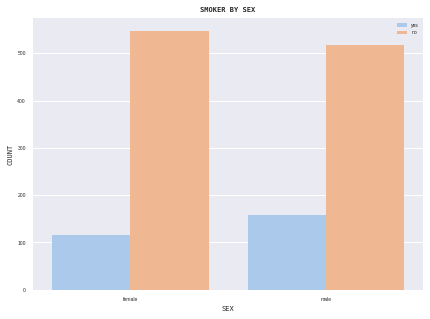

In [36]:
plt.style.use('seaborn')
plt.figure(figsize=(7, 5))
sns.countplot(data['sex'],hue=data['smoker'],palette="pastel")
plt.title('SMOKER BY SEX', fontdict={
          'fontname': 'Monospace', 'fontsize': 7, 'fontweight': 'bold'})
plt.xlabel('SEX', fontdict={'fontname': 'Monospace', 'fontsize': 7})
plt.ylabel('COUNT', fontdict={
           'fontname': 'Monospace', 'fontsize': 7})
plt.tick_params(labelsize=5)
plt.legend(loc=1, prop={'size': 5})
plt.show()

REGION VE SMOKER 

In [12]:
for degisken in data["smoker"]:
  if degisken=="yes" :
    yes = data.groupby(by=['region']).count()['smoker']
yes

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


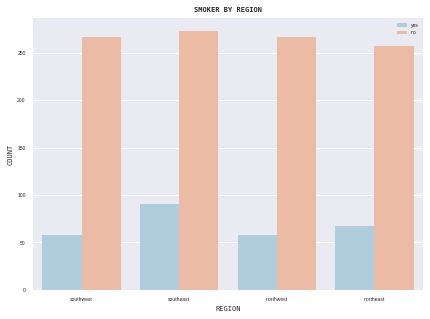

In [37]:
plt.style.use('seaborn')
plt.figure(figsize=(7, 5))
sns.countplot(data['region'],hue=data['smoker'],palette="RdBu_r")
plt.title('SMOKER BY REGION', fontdict={
          'fontname': 'Monospace', 'fontsize': 7, 'fontweight': 'bold'})
plt.xlabel('REGION', fontdict={'fontname': 'Monospace', 'fontsize': 7})
plt.ylabel('COUNT', fontdict={
           'fontname': 'Monospace', 'fontsize': 7})
plt.tick_params(labelsize=5)
plt.legend(loc=1, prop={'size': 5})
plt.show()

IBM'nin CİNSİYETLE İLİŞKİSİ

In [14]:
normal_bmi=[]
zayıf_bmi=[]
kilolu_bmi=[]
for degisken in data["bmi"]:  
      if (degisken>=18.5 and degisken<=24.9) :
        normal_bmi.append(degisken)
      elif degisken<18.5:
        zayıf_bmi.append(degisken)
      else:
        kilolu_bmi.append(degisken)
       
print(f"""Normal IBM'ye sahip kişi sayısı: {len(normal_bmi)}
Düşük IBM'ye sahip kişi sayısı: {len(zayıf_bmi)}
Kilolu kişi sayısı: {len(kilolu_bmi)}""")

Normal IBM'ye sahip kişi sayısı: 222
Düşük IBM'ye sahip kişi sayısı: 20
Kilolu kişi sayısı: 1096


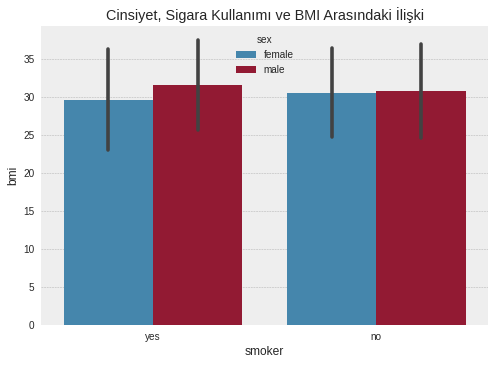

In [34]:
sns.barplot(data=data, x="smoker", y="bmi", hue="sex", ci="sd")
plt.title("Cinsiyet, Sigara Kullanımı ve BMI Arasındaki İlişki")
plt.show()

CHILDREN & REGIONS

In [16]:
palette=sns.color_palette("pastel")

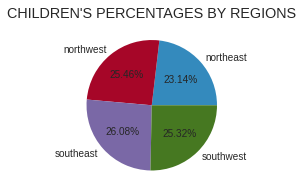

In [17]:
data_children = data[["region", "children"]].groupby(["region"]).sum()
plt.figure(figsize=(3, 3))
plt.style.use('bmh')
plt.pie(data_children.children,
        labels=data_children.index, 
        autopct = '%0.2f%%')
plt.title("CHILDREN'S PERCENTAGES BY REGIONS")
plt.show()

HEATMAP

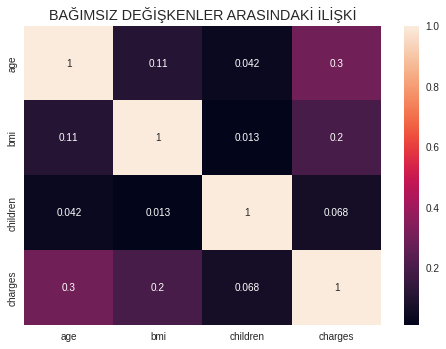

<Figure size 144x144 with 0 Axes>

In [18]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("BAĞIMSIZ DEĞİŞKENLER ARASINDAKİ İLİŞKİ")
plt.figure(figsize=(2,2))
plt.show()

CİNSİYET VE MASRAF DEĞİŞKENİ ARASINDAKİ İLİŞKİ

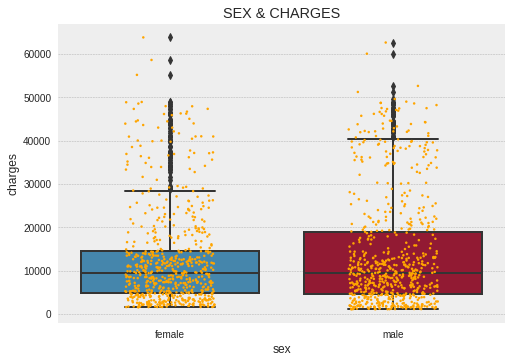

In [28]:
# boxplot
ax = sns.boxplot(x='sex', y='charges', data=data)
# add stripplot
ax = sns.stripplot(x='sex', y='charges', data=data, color="orange",jitter=0.2, size=2.5)
# add title
plt.title("SEX & CHARGES", loc="center")
# show the graph
plt.show()

SİGARA İÇME DURUMU İLE MASRAFLAR ARASINDAKİ İLİŞKİ

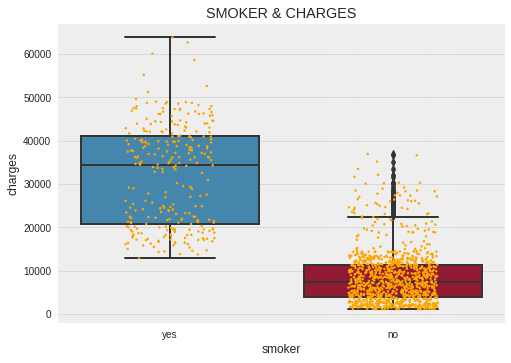

In [29]:
# boxplot
ax = sns.boxplot(x='smoker', y='charges', data=data)
# add stripplot
ax = sns.stripplot(x='smoker', y='charges', data=data, color="orange",jitter=0.2, size=2.5)
# add title
plt.title("SMOKER & CHARGES", loc="center")
# show the graph
plt.show()

YAŞ DEĞİŞKENİ İLE SİGORTA MASRAFI ARASINDAKI İLİŞKİ



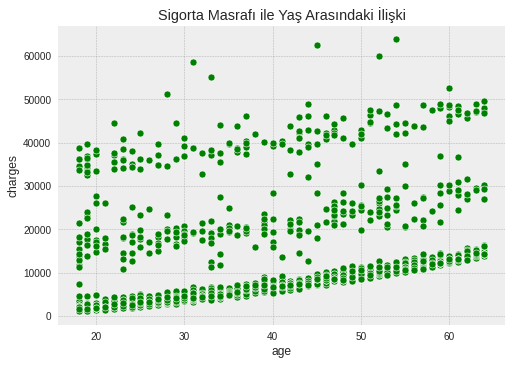

In [32]:
sns.scatterplot(data=data, x="age", y="charges",color="green")
plt.title("Sigorta Masrafı ile Yaş Arasındaki İlişki")
plt.show()